<a href="https://colab.research.google.com/github/TheRadDani/Image-captioning-with-transformers/blob/main/Image_captioning_vision_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [1]:
!pip install transformers[torch] datasets torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl

# Introduction to the Vision Transformer

In [2]:
from transformers import ViTModel
from PIL import Image


In [3]:
# Load up a pretrained Vision Transformer
VIT_MODEL = 'google/vit-base-patch16-224-in21k'

vit_model = ViTModel.from_pretrained(VIT_MODEL)

vit_model

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:99: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

ViTModel(
  (embeddings): ViTEmbeddings(
    (patch_embeddings): ViTPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): ViTEncoder(
    (layer): ModuleList(
      (0-11): 12 x ViTLayer(
        (attention): ViTSdpaAttention(
          (attention): ViTSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (output): ViTSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (intermediate): ViTIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=True)
          (intermediate_act_fn): GELUAct

In [4]:
# The idea of a Feature extractor is how we convert images to a tensor
from transformers import ViTImageProcessor #fixing deprecated feature extraction

feature_extractor = ViTImageProcessor.from_pretrained(VIT_MODEL)

# We need to pay attention to how images are preprocessed to match how the model was pretrained as closely as possible
feature_extractor

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

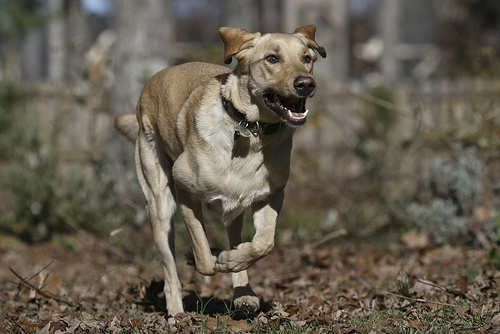

In [5]:
# Using Pillow's Image object with https://www.kaggle.com/datasets/adityajn105/flickr8k
import requests
from io import BytesIO

img_url = 'https://raw.githubusercontent.com/sinanuozdemir/oreilly-hands-on-transformers/main/data/flicker_images/3148647065_2d6cd88cf6.jpg'

response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
display(img)

In [6]:
display.__dir__()

['__new__',
 '__repr__',
 '__call__',
 '__get__',
 '__closure__',
 '__doc__',
 '__globals__',
 '__module__',
 '__builtins__',
 '__code__',
 '__defaults__',
 '__kwdefaults__',
 '__annotations__',
 '__dict__',
 '__name__',
 '__qualname__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__init__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

In [ ]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
img.size

(500, 334)

In [ ]:
img.mode

'RGB'

In [ ]:
img.format

'JPEG'

In [ ]:
img.format_description

'JPEG (ISO 10918)'

In [7]:
feature_extractor(img).keys()

dict_keys(['pixel_values'])

In [8]:
feature_extractor(img).pixel_values[0].shape

(3, 224, 224)

In [ ]:
feature_extractor(img).pixel_values[0][:1] #float format [0..1]

array([[[-0.4588235 , -0.44313723, -0.45098037, ..., -0.70980394,
         -0.70980394, -0.7254902 ],
        [-0.44313723, -0.45098037, -0.47450978, ..., -0.7176471 ,
         -0.7176471 , -0.7254902 ],
        [-0.46666664, -0.47450978, -0.4823529 , ..., -0.7176471 ,
         -0.7176471 , -0.70980394],
        ...,
        [-0.3960784 , -0.38823527, -0.41176468, ..., -0.30196077,
         -0.1607843 , -0.12941176],
        [-0.34117645, -0.38039213, -0.40392154, ..., -0.2235294 ,
         -0.21568626, -0.45098037],
        [-0.20784312, -0.29411763, -0.3490196 , ..., -0.26274508,
         -0.38823527, -0.23921567]]], dtype=float32)

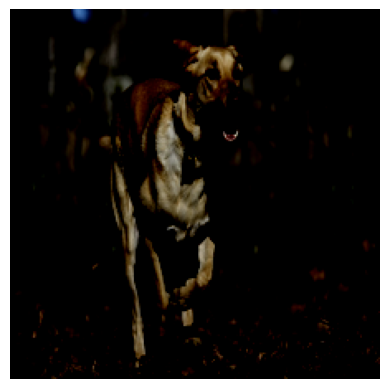

In [9]:
import matplotlib.pyplot as plt

plt.axis('off')
plt.imshow(feature_extractor(img).pixel_values[0].transpose(1, 2, 0))

## Fine-tuning an image captioning system

In [10]:
from transformers import VisionEncoderDecoderModel, GPT2TokenizerFast, ViTImageProcessor, \
                         AutoTokenizer, TrainingArguments, Trainer


from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from datasets import Dataset
import torch
from torch import numel
import numpy as np
from torchvision.transforms import RandomResizedCrop, Compose, Normalize, ToTensor, Resize, RandomHorizontalFlip
import pandas as pd

import requests
from io import BytesIO

In [ ]:
VisionEncoderDecoderModel

transformers.models.vision_encoder_decoder.modeling_vision_encoder_decoder.VisionEncoderDecoderModel

In [11]:
# Many weights are innitialized randomly, namely the cross attention weights
model = VisionEncoderDecoderModel.from_encoder_decoder_pretrained(
    'google/vit-base-patch16-224-in21k',
    'distilgpt2'
)

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

Some weights of GPT2LMHeadModel were not initialized from the model checkpoint at distilgpt2 and are newly initialized: ['transformer.h.0.crossattention.c_attn.bias', 'transformer.h.0.crossattention.c_attn.weight', 'transformer.h.0.crossattention.c_proj.bias', 'transformer.h.0.crossattention.c_proj.weight', 'transformer.h.0.crossattention.q_attn.bias', 'transformer.h.0.crossattention.q_attn.weight', 'transformer.h.0.ln_cross_attn.bias', 'transformer.h.0.ln_cross_attn.weight', 'transformer.h.1.crossattention.c_attn.bias', 'transformer.h.1.crossattention.c_attn.weight', 'transformer.h.1.crossattention.c_proj.bias', 'transformer.h.1.crossattention.c_proj.weight', 'transformer.h.1.crossattention.q_attn.bias', 'transformer.h.1.crossattention.q_attn.weight', 'transformer.h.1.ln_cross_attn.bias', 'transformer.h.1.ln_cross_attn.weight', 'transformer.h.2.crossattention.c_attn.bias', 'transformer.h.2.crossattention.c_attn.weight', 'transformer.h.2.crossattention.c_proj.bias', 'transformer.h.2.cr

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
type(model.encoder)

transformers.models.vit.modeling_vit.ViTModel

In [ ]:
type(model.decoder)

transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel

In [ ]:
numel

<function torch._VariableFunctionsClass.numel>

In [ ]:
total_params = 0
for param in model.parameters():
    total_params += numel(param)

print(f"Our model has a combined {total_params:,} parameters")

Our model has a combined 182,485,248 parameters


In [12]:
gpt2_tokenizer = GPT2TokenizerFast.from_pretrained('distilgpt2')

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [13]:
!git clone https://github.com/sinanuozdemir/oreilly-hands-on-transformers.git

Cloning into 'oreilly-hands-on-transformers'...
remote: Enumerating objects: 8253, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 8253 (delta 32), reused 53 (delta 28), pack-reused 8194
Receiving objects: 100% (8253/8253), 1.13 GiB | 14.67 MiB/s, done.
Resolving deltas: 100% (80/80), done.
Updating files: 100% (8114/8114), done.


In [14]:
IMAGES_PATH = 'oreilly-hands-on-transformers/data/flicker_images'
MIN_CAPTION, MAX_CAPTION = 2, 200  # feel free to set some input filtering on text lengths

def load_captions_data(filename):
    skipped = 0
    with open(filename) as caption_file:
        caption_data = caption_file.readlines()
        caption_mapping = {}
        text_data = []

        for line in caption_data:
            line = line.rstrip("\n")
            # Image name and captions are separated using a tab
            img_name, caption = line.split("\t")

            # Each image is repeated five times for the five different captions.
            # Each image name has a suffix `#(caption_number)`
            img_name = img_name.split("#")[0]
            img_name = os.path.join(IMAGES_PATH, img_name.strip())

            if img_name.endswith("jpg"):
                caption = caption.replace(' .', '').strip()
                tokens = caption.strip().split()
                if len(caption) < MIN_CAPTION or len(caption) > MAX_CAPTION:
                    skipped += 1
                    continue
                text_data.append(caption)

                if img_name in caption_mapping:
                    caption_mapping[img_name].append(caption)
                else:
                    caption_mapping[img_name] = [caption]
        return skipped, caption_mapping, text_data

# Load the dataset
skipped, captions_mapping, text_data = load_captions_data('oreilly-hands-on-transformers/data/Flickr8k.token.txt')

print(f'Skipped {skipped} captions')


Skipped 2 captions


In [ ]:
len(captions_mapping)

8091

In [ ]:
list(captions_mapping.items())[:5]

[('oreilly-hands-on-transformers/data/flicker_images/1000268201_693b08cb0e.jpg',
  ['A child in a pink dress is climbing up a set of stairs in an entry way',
   'A girl going into a wooden building',
   'A little girl climbing into a wooden playhouse',
   'A little girl climbing the stairs to her playhouse',
   'A little girl in a pink dress going into a wooden cabin']),
 ('oreilly-hands-on-transformers/data/flicker_images/1001773457_577c3a7d70.jpg',
  ['A black dog and a spotted dog are fighting',
   'A black dog and a tri-colored dog playing with each other on the road',
   'A black dog and a white dog with brown spots are staring at each other in the street',
   'Two dogs of different breeds looking at each other on the road',
   'Two dogs on pavement moving toward each other']),
 ('oreilly-hands-on-transformers/data/flicker_images/1002674143_1b742ab4b8.jpg',
  ['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl',
   'A little girl is sitting

In [15]:
feature_extractor = ViTImageProcessor.from_pretrained(VIT_MODEL)

In [16]:
feature_extractor

ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [ ]:
feature_extractor.size

{'height': 224, 'width': 224}

In [17]:
normalize = Normalize(
    mean=feature_extractor.image_mean,
    std=feature_extractor.image_std
)

_transforms = Compose(
    [
        RandomResizedCrop(
            (feature_extractor.size['height'], feature_extractor.size['width']),
            scale=[.8, 1]),                                         # Data augmentation. Take a random resized crop of our image
        RandomHorizontalFlip(),                                     # occasionally flip the image to promote model generalizability
        ToTensor(),                                                 # Convert to pytorch tensor
        normalize                                                   # normalize pixel values to look like images during pre-training
    ]
)

In [18]:
gpt2_tokenizer.eos_token_id

50256

In [22]:
rows = []

# We could use multiple captions per image but we won't for now because of our data augmentation
for path, captions in captions_mapping.items():
    for caption in captions:
        rows.append({'path': path, 'caption': caption + gpt2_tokenizer.eos_token})

        # We only want one caption per image
        # break  # remove this break to allow for multiple captions per photo

image_df = pd.DataFrame(rows)

image_dataset = Dataset.from_pandas(image_df)

In [ ]:
image_df.shape

(40453, 2)

In [ ]:
image_df.head()

,path,caption
0,oreilly-hands-on-transformers/data/flicker_ima...,A child in a pink dress is climbing up a set o...
1,oreilly-hands-on-transformers/data/flicker_ima...,A girl going into a wooden building<|endoftext|>
2,oreilly-hands-on-transformers/data/flicker_ima...,A little girl climbing into a wooden playhouse...
3,oreilly-hands-on-transformers/data/flicker_ima...,A little girl climbing the stairs to her playh...
4,oreilly-hands-on-transformers/data/flicker_ima...,A little girl in a pink dress going into a woo...


In [ ]:
type(Image.open(image_df['path'][0]))

PIL.JpegImagePlugin.JpegImageFile

In [23]:
gpt2_tokenizer.pad_token = gpt2_tokenizer.eos_token

def image_preprocess(examples):
    # ViT expects pixel_values instead of input_ids
    examples['pixel_values'] = [Image.open(path) for path in examples['path']]
    # We are padding tokens here instead of using a datacollator
    tokenized = gpt2_tokenizer(
        examples['caption'], padding='max_length', max_length=128, truncation=True
    )['input_ids']
    # the output captions
    examples['labels'] = [] # [l if l != gpt2_tokenizer.pad_token_id else -100 for l in t] for t in tokenized

    for t in tokenized:
        labels = []
        found = False
        for l in t:
            if l != gpt2_tokenizer.pad_token_id:
                labels.append(l)
            else:
                if not found:
                    found = True
                    labels.append(l)
                else:
                    labels.append(-100)
        examples['labels'].append(labels)

    # tokenize the captions making sure that the eos token is a label but the rest of the pad tokens are not

    # delete unused keys
    del examples['path']
    del examples['caption']
    return examples

In [24]:
image_dataset = image_dataset.train_test_split(test_size=0.1)

In [25]:
image_dataset['train'] = image_dataset['train'].map(image_preprocess, batched=True)

image_dataset['test'] = image_dataset['test'].map(image_preprocess, batched=True)

Map:   0%|          | 0/36407 [00:00<?, ? examples/s]

Map:   0%|          | 0/4046 [00:00<?, ? examples/s]

In [26]:
image_dataset['train'][0]

{'pixel_values': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=333x500>,
 'labels': [18495,
  5762,
  2266,
  290,
  2042,
  389,
  537,
  5912,
  50256,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -100,
  -10

In [31]:
gpt2_tokenizer.decode(gpt2_tokenizer.eos_token_id)

'<|endoftext|>'

In [ ]:
gpt2_tokenizer.decode([l for l in image_dataset['train'][0]['labels'] if l != -100], skip_special_tokens=False)

'Skateboarder jumping over a fence<|endoftext|>'

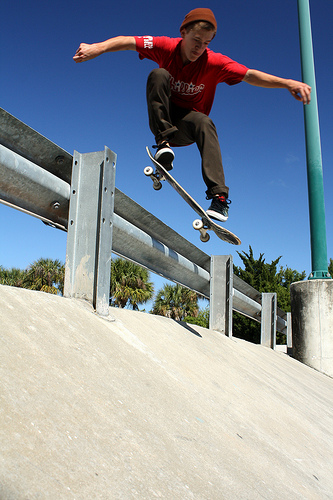

In [ ]:
image_dataset['train'][0]['pixel_values']

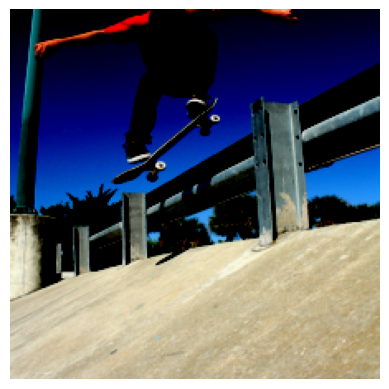

In [ ]:
plt.axis('off')
plt.imshow(_transforms(image_dataset['train'][0]['pixel_values']).permute(1, 2, 0))

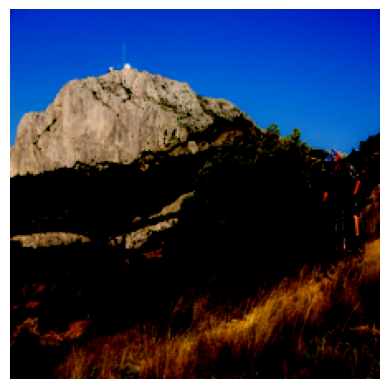

In [ ]:
plt.axis('off')
plt.imshow(_transforms(image_dataset['train'][1]['pixel_values']).permute(1, 2, 0))

In [ ]:
image_dataset

DatasetDict({
    train: Dataset({
        features: ['pixel_values', 'labels'],
        num_rows: 36407
    })
    test: Dataset({
        features: ['pixel_values', 'labels'],
        num_rows: 4046
    })
})

In [32]:
# We set a pad token and a start token in our combined model to be the same as gpt2

model.config.pad_token = gpt2_tokenizer.pad_token
model.config.pad_token_id = gpt2_tokenizer.pad_token_id

model.config.decoder_start_token = gpt2_tokenizer.bos_token
model.config.decoder_start_token_id = gpt2_tokenizer.bos_token_id

In [33]:
gpt2_tokenizer.bos_token

'<|endoftext|>'

In [ ]:
gpt2_tokenizer.bos_token_id

50256

In [34]:
# if we freezd, we freeze all but the last two layers in the ViT
FREEZE = False
if FREEZE:
    for name, param in model.encoder.named_parameters():
        if 'encoder.layer.10' in name:
            break
        print(f'freezing {name}')
        param.requires_grad = False

In [35]:
def collate_fn(examples):
    pixel_values = torch.stack([_transforms(example['pixel_values']) for example in examples])
    labels = torch.tensor([example['labels'] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}

In [36]:
training_args = TrainingArguments(
    output_dir='./image_captioning', # The output directory
    overwrite_output_dir=True, # overwrite the content of the output directory
    num_train_epochs=2, # number of training epochs
    per_device_train_batch_size=16, # batch size for training
    gradient_accumulation_steps=2, # gradient accumulation steps
    per_device_eval_batch_size=32,  # batch size for evaluation
    load_best_model_at_end=True,
    log_level='info',
    logging_steps=1,
    eval_strategy='epoch',
    save_strategy='epoch',
    report_to='all',
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=image_dataset['train'],
    eval_dataset=image_dataset['test'],
    data_collator=collate_fn
)

In [37]:
trainer.evaluate()


***** Running Evaluation *****
  Num examples = 4046
  Batch size = 32


{'eval_loss': 5.151027202606201,
 'eval_runtime': 97.21,
 'eval_samples_per_second': 41.621,
 'eval_steps_per_second': 1.306}

In [38]:
trainer.train()

***** Running training *****
  Num examples = 36,407
  Num Epochs = 2
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 2
  Total optimization steps = 2,276
  Number of trainable parameters = 182,485,248


Epoch,Training Loss,Validation Loss
1,2.544000,2.507570
2,2.561500,2.417961



***** Running Evaluation *****
  Num examples = 4046
  Batch size = 32


Saving model checkpoint to ./image_captioning/checkpoint-1138
Configuration saved in ./image_captioning/checkpoint-1138/config.json
Configuration saved in ./image_captioning/checkpoint-1138/generation_config.json
Model weights saved in ./image_captioning/checkpoint-1138/model.safetensors
Saving model checkpoint to ./image_captioning/checkpoint-2276
Configuration saved in ./image_captioning/checkpoint-2276/config.json
Configuration saved in ./image_captioning/checkpoint-2276/generation_config.json
Model weights saved in ./image_captioning/checkpoint-2276/model.safetensors

***** Running Evaluation *****
  Num examples = 4046
  Batch size = 32
Saving model checkpoint to ./image_captioning/checkpoint-2276
Configuration saved in ./image_captioning/checkpoint-2276/config.json
Configuration saved in ./image_captioning/checkpoint-2276/generation_config.json
Model weights saved in ./image_captioning/checkpoint-2276/model.safetensors


Training completed. Do not forget to share your model on hu

TrainOutput(global_step=2276, training_loss=2.614629643925045, metrics={'train_runtime': 4873.6782, 'train_samples_per_second': 14.94, 'train_steps_per_second': 0.467, 'total_flos': 9.410819316126843e+18, 'train_loss': 2.614629643925045, 'epoch': 2.0})

In [39]:
trainer.save_model()

Saving model checkpoint to ./image_captioning
Configuration saved in ./image_captioning/config.json
Configuration saved in ./image_captioning/generation_config.json
Model weights saved in ./image_captioning/model.safetensors


In [40]:
# loading model and config from fine-tuning folder
finetuned_model = VisionEncoderDecoderModel.from_pretrained('./image_captioning')

loading configuration file ./image_captioning/config.json
Model config VisionEncoderDecoderConfig {
  "architectures": [
    "VisionEncoderDecoderModel"
  ],
  "decoder": {
    "_name_or_path": "distilgpt2",
    "_num_labels": 1,
    "activation_function": "gelu_new",
    "add_cross_attention": true,
    "architectures": [
      "GPT2LMHeadModel"
    ],
    "attn_pdrop": 0.1,
    "bad_words_ids": null,
    "begin_suppress_tokens": null,
    "bos_token_id": 50256,
    "chunk_size_feed_forward": 0,
    "cross_attention_hidden_size": null,
    "decoder_start_token_id": null,
    "diversity_penalty": 0.0,
    "do_sample": false,
    "early_stopping": false,
    "embd_pdrop": 0.1,
    "encoder_no_repeat_ngram_size": 0,
    "eos_token_id": 50256,
    "exponential_decay_length_penalty": null,
    "finetuning_task": null,
    "forced_bos_token_id": null,
    "forced_eos_token_id": null,
    "id2label": {
      "0": "LABEL_0"
    },
    "initializer_range": 0.02,
    "is_decoder": true,
    "is

In [41]:
# Create a new composition that doesn't crop images for inference to make it easier for the model
inference_transforms = Compose(
    [
        Resize((feature_extractor.size['height'], feature_extractor.size['width'])),
        ToTensor(),
        normalize
    ]
)

In [42]:
# a helper function to caption images from the web or a file path
def caption_image(m, path):
    if 'http' in path:
        response = requests.get(path)
        img = Image.open(BytesIO(response.content))
        image_matrix = inference_transforms(img).unsqueeze(0)
    else:
        img = Image.open(path)
        image_matrix = inference_transforms(img).unsqueeze(0)

    generated = m.generate(
        image_matrix,
        num_beams=3,
        max_length=25,
        early_stopping=True,
        do_sample=True,
        top_p=.8,
        num_return_sequences=3,
        eos_token_id=gpt2_tokenizer.eos_token_id
    )

    caption_options = [gpt2_tokenizer.decode(g, skip_special_tokens=True).strip() for g in generated]
    display(img)
    return caption_options, generated, image_matrix


In [ ]:
captions, generated, image_matrix = caption_image(  # Another one
    finetuned_model, 'oreilly-hands-on-transformers/data/rocks.jpg'
)

captions

In [ ]:
# Looking for top non stopwords words in corpus

In [ ]:
vec = CountVectorizer(stop_words='english')

bag_of_words = vec.fit_transform(image_df['caption'])

sum_words = bag_of_words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

sorted(words_freq, key = lambda x: x[1], reverse=True)[:20]

[('endoftext', 40453),
 ('dog', 8138),
 ('man', 7274),
 ('white', 3959),
 ('black', 3848),
 ('boy', 3581),
 ('woman', 3402),
 ('girl', 3328),
 ('wearing', 3062),
 ('people', 2883),
 ('water', 2790),
 ('red', 2691),
 ('young', 2630),
 ('brown', 2578),
 ('blue', 2279),
 ('dogs', 2125),
 ('running', 2073),
 ('playing', 2008),
 ('shirt', 1962),
 ('standing', 1787)]

Generate config GenerationConfig {
  "decoder_start_token_id": 50256,
  "pad_token_id": 50256
}



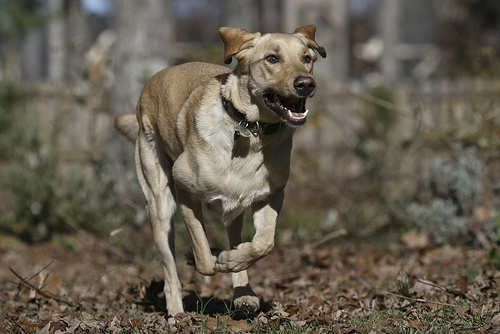

['A brown and white dog is running through the grass',
 'A brown and white dog is running through the woods',
 'A brown and white dog runs through the woods']

In [ ]:
captions, generated, image_matrix = caption_image(  # from our flicker dataset
    finetuned_model,
    'oreilly-hands-on-transformers/data/flicker_images/3148647065_2d6cd88cf6.jpg'
)
captions

In [ ]:
non_finetuned = VisionEncoderDecoderModel.from_encoder_decoder_pretrained(
    'google/vit-base-patch16-224-in21k',
    'distilgpt2'
)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--google--vit-base-patch16-224-in21k/snapshots/7cbdb7ee3a6bcdf99dae654893f66519c480a0f8/config.json
Model config ViTConfig {
  "_name_or_path": "google/vit-base-patch16-224-in21k",
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.35.2"
}

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--google--vit-base-patch16-224-in21k/snapshots/7cbdb7ee3a6bcdf99dae654893f66519c480a0f8/pytorch_model.bin
All model checkpoint weights were used when initializing ViTModel.

All t

Generate config GenerationConfig {}

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


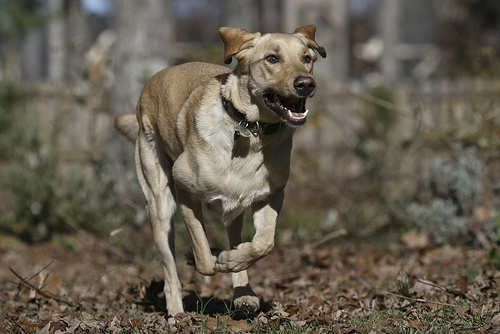

['The U.S. government has said it will not allow refugees to leave the country.',
 'The U.S. government has said it will not allow refugees to leave the country.\n\n\n\n\nThe',
 'The U.S. government has said it will not allow refugees to leave the country because of security concerns.']

In [ ]:
# Sanity check that a pretrained model alone couldn't do this

captions, generated, image_matrix = caption_image(
    non_finetuned, 'oreilly-hands-on-transformers/data/flicker_images/3148647065_2d6cd88cf6.jpg'
)
captions